# **Edge Detection**
In this notebook, we will find edges using *Sobel operator* and *Canny edge detector*


In [1]:
import numpy as np
import cv2
import math
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request
def Image_openner(url: str, image_name: str='temp.jpg'):
  """
  Image retriever from given url

  Args:
    url (str): url indicating an image to open
    image_name (str): image from the url will be saved with the name of image_name.
  
  Returns:
    img: PIL image oject
  """
  urllib.request.urlretrieve(url, image_name)
  return Image.open(image_name)

img array size (H,W,C) : (2720, 4106, 3)


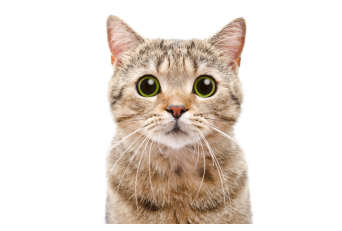

In [3]:
# Load an image into memory

# TODO 1. get url of a image you want to use
url = 'https://static.toiimg.com/photo/msid-67586673/67586673.jpg?3918697' 
# TODO 2. use Image_opnner function to save & open Image
input_image = Image_openner(url=url, image_name='cat.jpg')

print('img array size (H,W,C) : {}'.format(np.asarray(input_image).shape))
plt.imshow(input_image)
plt.axis('off')
plt.show()

In this tutorial, we will just consider *gray scale* images. 
Converting a 3 channel image to 1 channel is pretty easy for PIL Image object!

img array size (H,W) : (2720, 4106)


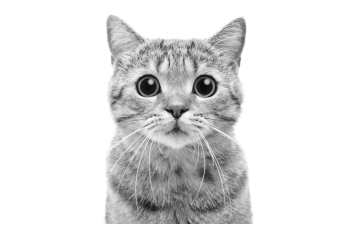

In [4]:
# convert RGB image to gray sacle
input_image = input_image.convert('L')

print('img array size (H,W) : {}'.format(np.asarray(input_image).shape))
plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in the grayscale setting.
plt.axis('off')
plt.show()

Next, we will look at useful cv2 functions. Since cv2 module uses numpy array object, we should convert our input image from PIL object to numpy array.

This can be done by simply calling ```np.asarray()```.



In [5]:
input_array = np.asarray(input_image)

# **1. Edge detection with sobel operator**


```dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)```


*   ``` src ```: input image
*   ``` ddepth ```: output image depth
*   ``` dx ```: order of the derivative x
*   ``` dy ```: order of the derivative y
*   ``` ksize ```: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
*   ``` scale ```: optional scale factor for the computed derivative values

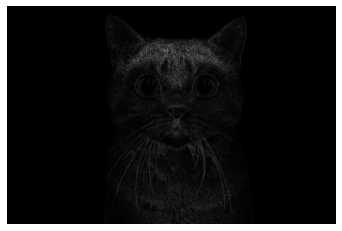

In [6]:
ddepth = cv2.CV_64F # 64-bit float output
dx = 1 # First-order derivative in x-direction
dy = 0 # No derivative in y-direction
sobelx = cv2.Sobel(input_array, ddepth, dx, dy)

plt.imshow(np.abs(sobelx), cmap='gray')
plt.axis('off')
plt.show()

`cv2.pow(img, value)` 
-  input
  - `img`: input image
  - `value`: power value
- output
  - img ^ value

`cv2.addWeighted(A, A_weight, B, B_weight)`
- input
  - `A`: input_image 1
  - `A_weight`: weight of input_iamge 1
  - `B`: input_image 2
  - `B_weight`: weight of input_image 2
- output
  - A * A_weight + B * B_weight

`cv2.sqrt(img)`
- input
  - `img`: input image
- output
  - root of image

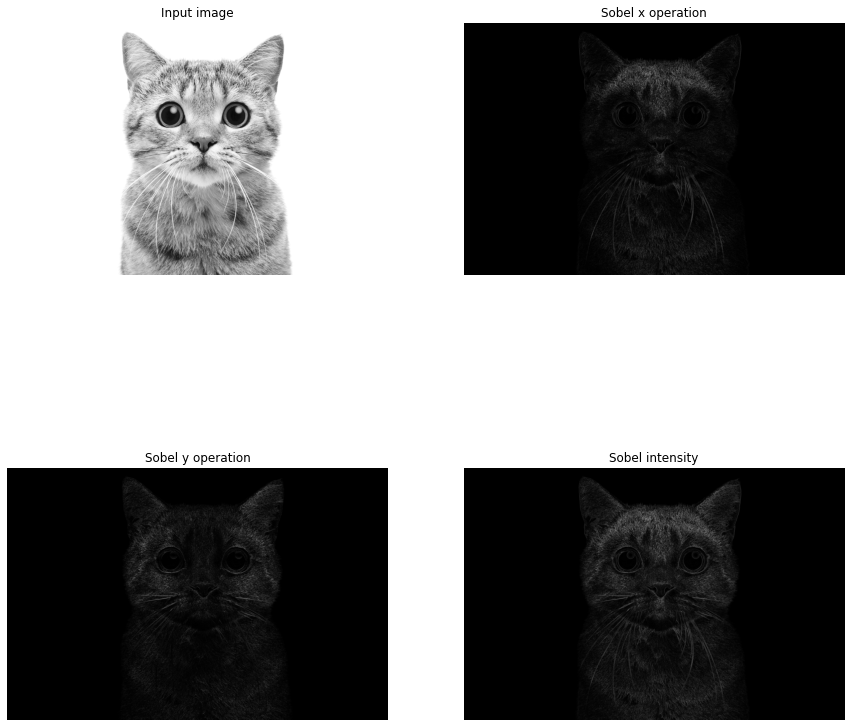

In [7]:
# sobel operations and its magnitudes
# TODO 1. apply sobel operation on x dimension
sobelx = cv2.Sobel(input_array, cv2.CV_64F, 1, 0) 
# TODO 2. apply sobel operation on y dimension
sobely = cv2.Sobel(input_array, cv2.CV_64F, 0, 1) 
# TODO 3. get the L2norm (intensity) of derivative vector
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0)) 

# TODO 4. Plot 4 images (input, sobel x, sobel y, sobel intensity) with 2row, 2col subplots
plt.figure(figsize=(15, 15));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_array, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');

# **2. Canny Edge Detection**


```edges = cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)```


*   ``` image ```: 8-bit grayscale input image
*   ``` threshold1 ```: min value for the hysteresis Thresholding procedure
*   ``` threshold2 ```: max value for the hysteresis Thresholding procedure
*   ``` apertureSize ```: aperture size for the ```Sobel()``` operator
*   ``` L2gradient ```: A flag. ```True``` to use $L_2$-norm of gradients. $L_1$-norm for 'False'

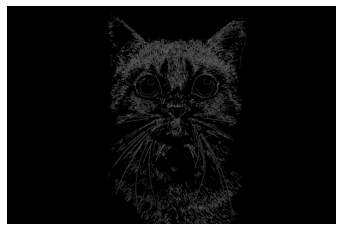

In [8]:
# Canny edge detection

kernel_size = (5,5)
sigmaX, sigmaY = 1, 1
# TODO 1. apply Gaussian smoothing operations
smoothed = cv2.GaussianBlur(input_array, kernel_size, sigmaX, sigmaY)

threshold1 = 100
threshold2 = 200
# TODO 2. call the cv2.Canny function
canny = cv2.Canny(smoothed, threshold1, threshold2)

plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()

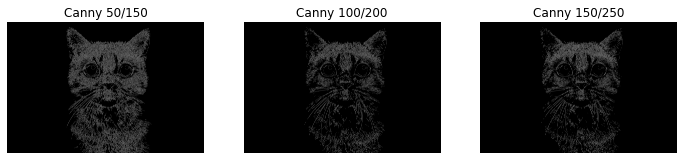

In [9]:
# Role of hyper-parameters 

# TODO 1. best configuration
smoothed = cv2.GaussianBlur(input_array, (3,3), 1, 1)
canny1 = cv2.Canny(smoothed, 50, 150)
# TODO 2. best configuration
smoothed = cv2.GaussianBlur(input_array, (3,3), 4, 4)
canny2 = cv2.Canny(smoothed, 100, 200)
# TODO 3. best configuration
smoothed = cv2.GaussianBlur(input_array, (5,5), 0.1, 0.1)
canny3 = cv2.Canny(smoothed, 150, 250)

# TODO 4. plot results
plt.figure(figsize=(12, 6));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');
plt.show()

---

# **Practice: Edge Detection**

Write a function that finds edge intensity and orientation in an image.

```Im, Im_supp, Io, Ix, Iy = myedgeFilter(img, ksize, sigma)```

The function inputs
- a greyscale image `(img)` (numpy array), 
- `ksize` (scalar) : the square kernel size
- `sigma` (scalar) : the standard deviation 

`ksize` and `sigma` are parameters for the Gaussian smoothing kernel to be used before edge detection. 

The function outputs
- `Im`: the edge magnitude image; 
- `Im_supp`: non maximum suppressed `Im`
- `Io`: the gradient orientation image
- `Ix` and `Iy`: edge filter responses in the `x` and `y` directions respectively.


First, use your convolution function to smooth out the image with the specified Gaussian kernel. This helps reduce noise and spurious fine edges in the image. To find the image gradient in the x direction `Ix`, convolve the smoothed image with the x oriented Sobel filter. Similarly, find `Iy` by convolving the smoothed image with the y oriented Sobel filter.

The edge magnitude image Im and the edge orientation image Io can be calculated from Ix and Iy.

In many cases, the high gradient magnitude region along an edge will be quite thick. For finding lines its best to have edges that are a single pixel wide. Towards this end, make your edge filter implement non maximal suppression, that is for each pixel look at the two neighboring pixels along the gradient direction and if either of those pixels has a larger gradient magnitude then set the edge magnitude at the center pixel to zero.

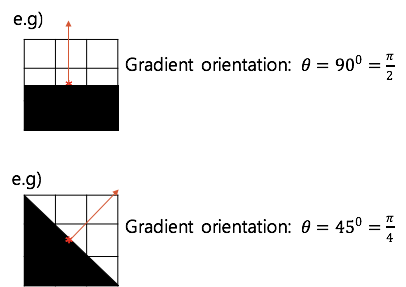

Image from : https://i.imgur.com/CdLjJN7.png

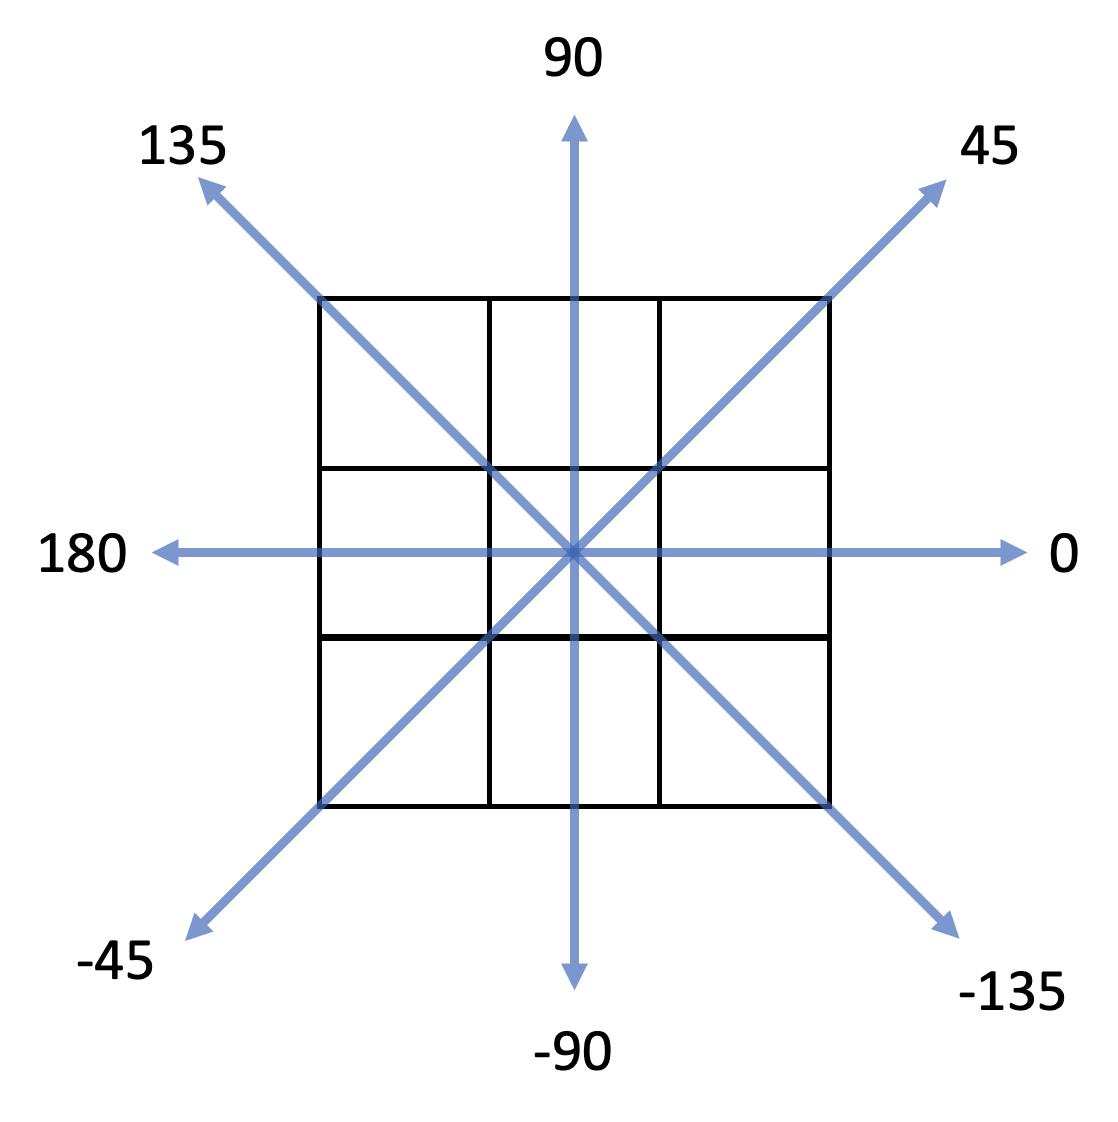

In [10]:
def myEdgeFilter(img, ksize, sigma):
    # helper function to check whether pixel has any neighbor or not
    def is_valid(x, y, max_x, max_y):
      if x < 0 or y < 0 or x > max_x or y > max_y:
        return False
      return True
    # is_valid = lambda x, y, max_x, max_y: False if x < 0 or y < 0 or x > max_x or y > max_y else True

    # TODO 1. Apply gaussian filter
    img = cv2.GaussianBlur(img, ksize, sigma, sigma)
    
    # TODO 2. Apply sobel_x, sobel_y filter
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1)

    # TODO 3. get Im (edge magnitude)
    Im = cv2.sqrt(cv2.pow(sobelx, 2.0) + cv2.pow(sobely, 2.0))

    # TODO 4. get Io (grdient orientation)
    nonzero_mask = Ix != 0
    Io = np.ones_like(img) * 90
    Io[nonzero_mask] = np.degrees(np.arctan2(Iy[nonzero_mask], Ix[nonzero_mask]))

    
    # TODO 5. Apply non-maximum-suppression
    # note that, edge and gradient are orthogonal to each other.
    Im_supp = Im.copy()
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          angle = abs(Io[i][j])
          if angle < 22.5 or angle >= 157.5:  # gradient along x axis
            neighbor1 = [i, j + 1]
            neighbor2 = [i, j - 1]
          elif angle < 67.5:  # gradient along y=x
            neighbor1 = [i + 1, j - 1]
            neighbor2 = [i - 1, j + 1]
          elif angle < 112.5:  # gradient along y axis
            neighbor1 = [i + 1, j]
            neighbor2 = [i - 1, j]
          elif angle < 157.5:  # gadient along y=-x axis
            neighbor1 = [i - 1, j - 1]
            neighbor2 = [i + 1, j + 1]
          else:
            raise Exception("angle categorization error!")
        
          # if the pixel have neighborhood along edge, compare value.
          values = [Im[i, j]]
          if is_valid(neighbor1[0], neighbor1[1], img.shape[0] - 1, img.shape[1] - 1):
            values.append(Im[neighbor1[0], neighbor1[1]])
          if is_valid(neighbor2[0], neighbor2[1], img.shape[0] - 1, img.shape[1] - 1):
            values.append(Im[neighbor2[0], neighbor2[1]])

          if max(values) != Im[i, j]:
            Im_supp[i, j] = 0

    return Im, Im_supp, Io, Ix, Iy

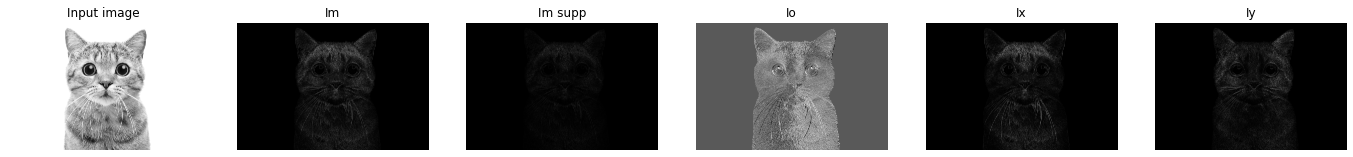

In [11]:
# Change parameters and see what happens!
img = input_array.copy()
Im, Im_supp, Io, Ix, Iy = myEdgeFilter(img, (3, 3), 2)

plt.figure(figsize=(24, 4));
plt.subplot(1, 6, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(img, cmap='gray');
plt.subplot(1, 6, 2); plt.title('Im'); plt.axis('off');
plt.imshow(Im, cmap='gray');
plt.subplot(1, 6, 3); plt.title('Im supp'); plt.axis('off');
plt.imshow(Im_supp, cmap='gray');
plt.subplot(1, 6, 4); plt.title('Io'); plt.axis('off');
plt.imshow(Io, cmap='gray');
plt.subplot(1, 6, 5); plt.title('Ix'); plt.axis('off');
plt.imshow(cv2.absdiff(Ix, 0.0), cmap='gray');
plt.subplot(1, 6, 6); plt.title('Iy'); plt.axis('off');
plt.imshow(cv2.absdiff(Iy, 0.0), cmap='gray');
plt.show()



# **Extra Practice: Hysteresis**
Write a function that filters `Im_supp` so that high confident edges can be found.

`edge = hysteresis(Im_supp, low_th, high_th)`

Still, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. If an edge pixel’s gradient value is higher than the `high_th` value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the `high)th` value and larger than the `low_th` value, it is marked as a weak edge pixel. If an edge pixel's gradient value is smaller than the `low_th`, it will be suppressed. 

The strong edge pixels should certainly be involved in the final edge image, as they are extracted from the true edges in the image. Usually a weak edge pixel caused from true edges will be connected to a strong edge pixel while noise responses are unconnected. As long as there is one strong edge pixel that is involved in the 8 neighborhood pixels, that weak edge point can be identified as one that should be preserved.



In [12]:
def hysteresis(Im_supp, low_th, high_th):
    confident_edge = np.zeros_like(Im_supp)
    for i in range(Im_supp.shape[0]):
      for j in range(Im_supp.shape[1]):  
          if Im_supp[i,j] > high_th: # TODO 1. identify strong pixel and make its value 255 (max value of image)
            confident_edge[i, j] = 255.
          elif Im_supp[i,j] < low_th: # TODO 2. identify suppressed pixel and make its value 0 (min value of image)
            confident_edge[i, j] = 0.
          
    
    # TODO 3. identify weak pixel and determine each of weak pixels is real edge 
    # or not considering its neighborhood
    weak_edge = np.zeros_like(Im_supp)
    for i in range(Im_supp.shape[0]):
      for j in range(Im_supp.shape[1]):
        if Im_supp[i, j] >= low_th and Im_supp[i, j] <= high_th:
          if i + 1 < Im_supp.shape[0] and confident_edge[i + 1, j] == 255.:
            weak_edge[i, j] = 255.
          elif i + 1 < Im_supp.shape[0] and j + 1 < Im_supp.shape[1] and confident_edge[i + 1, j + 1] == 255.:
            weak_edge[i, j] = 255.
          elif j + 1 < Im_supp.shape[1] and confident_edge[i, j + 1] == 255.:
            weak_edge[i, j] = 255.
          elif i - 1 >= 0 and j + 1 < Im_supp.shape[1] and confident_edge[i - 1, j + 1] == 255.:
            weak_edge[i, j] = 255.
          elif i - 1 >= 0 and confident_edge[i - 1, j] == 255.:
            weak_edge[i, j] = 255.
          elif i - 1 >= 0 and j - 1 >=0 and confident_edge[i - 1, j - 1] == 255.:
            weak_edge[i, j] = 255.
          elif j - 1 >= 0 and confident_edge[i, j - 1] == 255.:
            weak_edge[i, j] = 255.
          elif i + 1 < Im_supp.shape[0] and j - 1 >= 0 and confident_edge[i - 1, j + 1] == 255:
            weak_edge[i, j] = 255.

    edge = confident_edge + weak_edge
    return edge

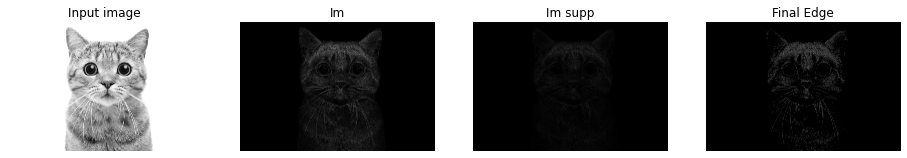

In [13]:
# change threshold parameters and see results!
edge = hysteresis(Im_supp, 100, 200)

plt.figure(figsize=(16, 4));
plt.subplot(1, 4, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(img, cmap='gray');
plt.subplot(1, 4, 2); plt.title('Im'); plt.axis('off');
plt.imshow(Im, cmap='gray');
plt.subplot(1, 4, 3); plt.title('Im supp'); plt.axis('off');
plt.imshow(Im_supp, cmap='gray');
plt.subplot(1, 4, 4); plt.title('Final Edge'); plt.axis('off');
plt.imshow(edge, cmap='gray');
plt.show()